# [__Introduction to Python__](https://eventum.upf.edu/64915/section/30365/recsm-summer-methods-school-2021.html)

### [Tom Paskhalis](https://tom.paskhal.is/)

### [RECSM Summer School 2021](https://eventum.upf.edu/64915/detail/recsm-summer-methods-school-2021.html), Exploratory Data Analysis & Data Visualization, Part 4, Day 2

## Exploratory data analysis

- "Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone--as the first step." ([Tukey, 1977](https://archive.org/details/exploratorydataa0000tuke_7616))
- Exploratory data analysis (EDA) is the first and often most important step in research
- Study's feasibility, scope and framing would usually depend on its results
- Specific details of EDA depend upon the type and quality of data available

## Measurement scales

<div style="text-align: center;">
    <img width="700" height="400" src="imgs/Stevens1946_tab1.png">
</div>

Source: [Stevens (1946)](https://doi.org/10.1126/science.103.2684.677)

## Measurement scales in Pandas

- The 4 measurement scales defined by Stevens (1946) can be roughly represented in pandas as follows:
- *Interval* and *ratio* -> numeric
- *Nominal* and *ordinal* -> [categorical](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

## Loading the dataset

In [1]:
import pandas as pd

In [2]:
# This time let's skip the 2nd row, which contains questions
kaggle2020 = pd.read_csv('../data/kaggle_survey_2020_responses.csv', skiprows = [1])
kaggle2020.head(n = 1)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# We will load the questions as a separate dataset
kaggle2020_qs = pd.read_csv('../data/kaggle_survey_2020_responses.csv', nrows = 1)
kaggle2020_qs

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."


## Summarizing numeric variables

- DataFrame methods in pandas can automatically handle (exclude) missing data (`NaN`)

In [4]:
kaggle2020.describe() # DataFrame.describe() provides an range of summary statistics

,Time from Start to Finish (seconds)
count,2.003600e+04
mean,9.155865e+03
std,6.136760e+04
min,2.000000e+01
25%,3.980000e+02
50%,6.260000e+02
75%,1.030250e+03
max,1.144493e+06


## Methods for summarizing numeric variables

In [5]:
kaggle2020.iloc[:,0].mean() # Rather than using describe(), we can apply individual methods

9155.864843282092

In [6]:
kaggle2020.iloc[:,0].median() # Median

626.0

In [7]:
kaggle2020.iloc[:,0].std() # Standard deviation

61367.59967471586

In [8]:
import statistics ## We don't have to rely only on methods provided by `pandas`
statistics.stdev(kaggle2020.iloc[:,0])

61367.59967471586

## Summarizing categorical variables

In [9]:
kaggle2020.describe(include = 'all') # Adding include = 'all' tells pandas to summarize all variables

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
count,2.003600e+04,20036,20036,20036,19569,19277,19120,15530,4277,7535,...,1177,494,430,3199,557,480,846,519,3082,251
unique,NaN,11,5,55,7,13,7,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,NaN,25-29,Man,India,Master’s degree,Student,3-5 years,Python,R,SQL,...,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,None,Other
freq,NaN,4011,15789,5851,7859,5171,4546,15530,4277,7535,...,1177,494,430,3199,557,480,846,519,3082,251
mean,9.155865e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6.136760e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.980000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.260000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.030250e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Methods for summarizing categorical variables

In [10]:
kaggle2020.iloc[:,2].mode() # Mode, most frequent value

0    Man
dtype: object

In [11]:
kaggle2020.iloc[:,2].value_counts() # Counts of unique values

Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Q2, dtype: int64

In [12]:
kaggle2020.iloc[:,2].value_counts(normalize = True) # We can further normalize them by the number of rows

Man                        0.788032
Woman                      0.193552
Prefer not to say          0.013126
Prefer to self-describe    0.002695
Nonbinary                  0.002595
Name: Q2, dtype: float64

## Summary of descriptive statistics methods

| Method         | Numeric   | Categorical   | Description                                    |
|:---------------|:----------|:--------------|:-----------------------------------------------|
| `count`        | yes       | yes           | Number of non-NA observations                  |
| `value_counts` | yes       | yes           | Number of unique observations by value         |
| `describe`     | yes       | yes           | Set of summary statistics for Series/DataFrame |
| `min`, `max`   | yes       | yes (caution) | Minimum and maximum values                     |
| `quantile`     | yes       | no            | Sample quantile ranging from 0 to 1            |
| `sum`          | yes       | yes (caution) | Sum of values                                  |
| `prod`         | yes       | no            | Product of values                              |
| `mean`         | yes       | no            | Mean                                           |
| `median`       | yes       | no            | Median (50% quantile)                          |
| `var`          | yes       | no            | Sample variance                                |
| `std`          | yes       | no            | Sample standard deviation                      |
| `skew`         | yes       | no            | Sample skewness (third moment)                 |
| `kurt`         | yes       | no            | Sample kurtosis (fourth moment)                |

## Crosstabulation

- When working with survey data it is often useful to perform simple crosstabulations
- Crosstabulation (or *crosstab* for short) is a computation of group frequencies
- It is usually used for working with categorical variables that have a limited number of categories
- In pandas `pd.crosstab()` method is a special case of `pd.pivot_table()`

## Crosstabulation in pandas

In [13]:
# Calculate crosstabulation between 'Age group' (Q1) and 'Gender' (Q2)
pd.crosstab(kaggle2020['Q1'], kaggle2020['Q2'])

Q2,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
Q1,,,,,
18-21,2611,8,42,12,796
22-24,2838,12,41,9,886
25-29,3128,13,42,9,819
30-34,2246,8,44,9,504
35-39,1581,7,33,2,368
40-44,1153,2,15,5,222
45-49,840,1,17,4,126
50-54,605,0,10,2,81
55-59,353,0,13,0,45


## Margins in crosstab

In [14]:
# It is often useful to see the proportions/percentages rather than raw counts
pd.crosstab(kaggle2020['Q1'], kaggle2020['Q2'], normalize = 'columns')

Q2,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
Q1,,,,,
18-21,0.165368,0.153846,0.159696,0.222222,0.205260
22-24,0.179745,0.230769,0.155894,0.166667,0.228468
25-29,0.198113,0.250000,0.159696,0.166667,0.211191
30-34,0.142251,0.153846,0.167300,0.166667,0.129964
35-39,0.100133,0.134615,0.125475,0.037037,0.094894
40-44,0.073026,0.038462,0.057034,0.092593,0.057246
45-49,0.053202,0.019231,0.064639,0.074074,0.032491
50-54,0.038318,0.000000,0.038023,0.037037,0.020887
55-59,0.022357,0.000000,0.049430,0.000000,0.011604


## Crosstabulation in pandas with `pivot_table`

In [15]:
# For `values` variable we use `Q3`, but any other would work equally well 
pd.pivot_table(kaggle2020, index = 'Q1', columns = 'Q2', values = 'Q3', aggfunc = 'count', fill_value = 0)

Q2,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
Q1,,,,,
18-21,2611,8,42,12,796
22-24,2838,12,41,9,886
25-29,3128,13,42,9,819
30-34,2246,8,44,9,504
35-39,1581,7,33,2,368
40-44,1153,2,15,5,222
45-49,840,1,17,4,126
50-54,605,0,10,2,81
55-59,353,0,13,0,45


## Data visualization

<div style="text-align: center;">
    <img width="700" height="400" src="imgs/Tufte2001_napoleon.png">
</div>

Source: [Tufte (2001)](https://www.edwardtufte.com/tufte/books_vdqi), based on Marey (1885)

## Data visualization in Python

- As with dealing with data, Python has no in-built, 'base' plotting functionality
- `matplotlib` has become the one of standard solutions
- It is often used [in combination with `pandas`](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
- Other popular alternative include `seaborn` and `plotnine`
- Also `pandas` itself has some limited plotting facilities

## `plotnine` - `ggplot` for Python

- `plotnine` implements Grammar of Graphics data visualisation scheme [(Wilkinson, 2005)](https://doi.org/10.1007/0-387-28695-0)
- It mimics the syntax of a well-known R library `ggplot2`syntax [(Wickham, 2010)](https://doi.org/10.1198/jcgs.2009.07098)
- In doing so, it makes the code (almost) seamlessly portable between the two languages

## Grammar of graphics

- Grammar of Graphics is a powerful conceptualization of plotting
- Graphs are broken into multiple layers
- Layers can be recycled across multiple plots

## Structure of ggplot calls in `plotnine`

- Creation of ggplot objects in `plotline` has the following structure:

```
ggplot(data = <DATA>) +\
    <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```

- If the *mappings* are re-used across geometric objects (e.g. scatterplot and line):

```
ggplot(data = <DATA>, mapping = aes(<MAPPINGS>)) +\
    <GEOM_FUNCTION>() +\
    <GEOM_FUNCTION>()
```

## Creating a ggplot in `plotnine`

In [16]:
from plotnine import *

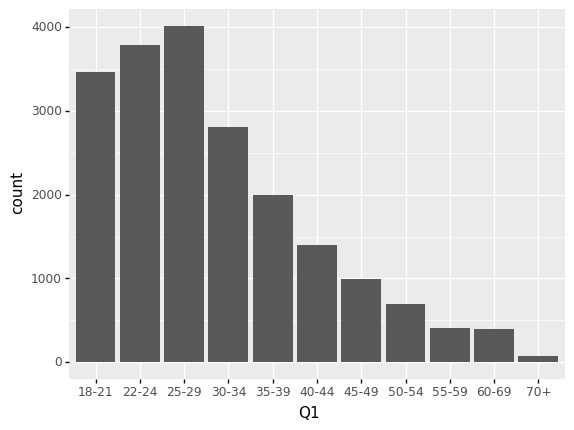

<ggplot: (8726572320898)>

In [17]:
q1_plot = ggplot(data = kaggle2020) + geom_bar(aes(x = 'Q1')) # Basic 'Age group' (Q1) bar chart
q1_plot

## Compare to base `pandas`

In [18]:
# First we need to group dataset by 'Age group' (Q1) and summarize it with `size()`
kaggle2020_q1_grouped = kaggle2020.groupby(['Q1']).size() 
kaggle2020_q1_grouped.head(n = 3)

Q1
18-21    3469
22-24    3786
25-29    4011
dtype: int64

<AxesSubplot:xlabel='Q1'>

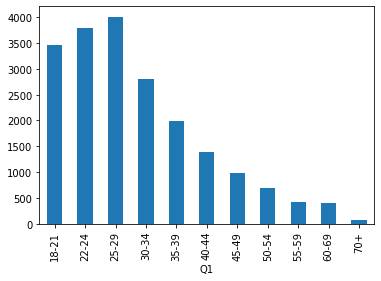

In [19]:
kaggle2020_q1_grouped.plot(kind = 'bar')

## Compare to `matplotlib`

In [20]:
import matplotlib.pyplot as plt

<BarContainer object of 11 artists>

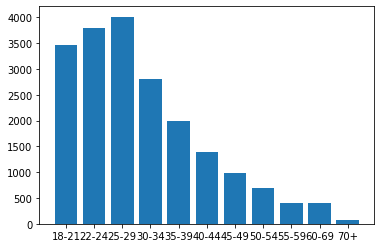

In [21]:
# `matplotlib` is more low-level library
# plots would need more work to be 'prettified'
plt.bar(x = kaggle2020_q1_grouped.index, height = kaggle2020_q1_grouped.values)

## Prettifying ggplot in `plotnine`

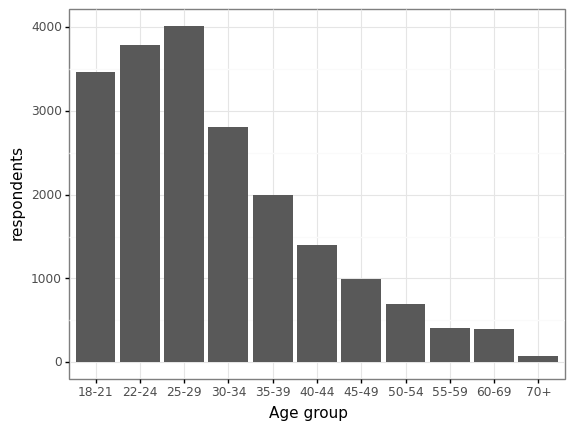

<ggplot: (8726570041393)>

In [22]:
# Here we change default axes' labels and then apply B&W theme
q1_plot_pretty = q1_plot +\
    labs(x = 'Age group', y = 'respondents') +\
    theme_bw()
q1_plot_pretty

## Other geometric objects (`geom_`)

| Method                       | Description                |
|:-----------------------------|:---------------------------|
| `geom_bar()`, `geom_col()`   | Bar charts                 |
| `geom_boxplot()`             | Box and whisker plot       |
| `geom_histogram()`           | Histogram                  |
| `geom_point()`               | Scatterplot                |
| `geom_line()`, `geom_path()` | Lines                      |
| `geom_map()`                 | Geographic areas           |
| `geom_smooth()`              | Smoothed conditional means |
| `geom_violin()`              | Violin plots               |


## Writing plots out in `plotnine`

- Output format is automatically determined from write-out file extension
- Commonly used formats are PDF, PNG and EPS

In [23]:
q1_plot_pretty.save('../temp/q1_plot_pretty.pdf')

/home/tpaskhalis/Decrypted/Git/RECSM_2021/venv/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/tpaskhalis/Decrypted/Git/RECSM_2021/venv/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ../temp/q1_plot_pretty.pdf


## Additional visualization materials

Books:

- Hieran, Kiely. 2019. *Data Visualization: A Practical Introduction*. Princeton, NJ: Princeton University Press
- Tufte, Edward. 2001. *The Visual Display of Quantitative Information*. 2nd ed. Cheshire, CT: Graphics Press

Online:

- [Plotnine: Grammar of Graphics for Python](https://datascienceworkshops.com/blog/plotnine-grammar-of-graphics-for-python/)
- [Plotnine Documentation](https://plotnine.readthedocs.io/en/stable/index.html)
- [Ggplot2 Documentation](https://ggplot2.tidyverse.org/)

## Next

- Linear regression
- Communicating results